## UMAP Analysis of VirProBERT Few Shot Classifier
### Dataset: EMBL mapping, Vertebrates, IDV

**Models**: VirProBERT, Few-Shot Classifier

**Maximum Sequence Length**: segment len 256, stride 64

In [1]:
import sys
import os
sys.path.append(os.path.join(os.getcwd(), "..", "..", "..", "..", ".."))
sys.path.append(os.path.join(os.getcwd(), "..", "..", "..", ".."))
sys.path.append(os.path.join(os.getcwd(), "..", "..", ".."))
sys.path.append(os.path.join(os.getcwd(), "..", ".."))
sys.path

['/home/blessyantony/miniconda3/envs/zoonosis/lib/python311.zip',
 '/home/blessyantony/miniconda3/envs/zoonosis/lib/python3.11',
 '/home/blessyantony/miniconda3/envs/zoonosis/lib/python3.11/lib-dynload',
 '',
 '/home/blessyantony/miniconda3/envs/zoonosis/lib/python3.11/site-packages',
 '/home/blessyantony/dev/git/zoonosis/src/jupyter_notebooks/few_shot_learning/../../../../..',
 '/home/blessyantony/dev/git/zoonosis/src/jupyter_notebooks/few_shot_learning/../../../..',
 '/home/blessyantony/dev/git/zoonosis/src/jupyter_notebooks/few_shot_learning/../../..',
 '/home/blessyantony/dev/git/zoonosis/src/jupyter_notebooks/few_shot_learning/../..']

In [2]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import pandas as pd
import os
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from pathlib import Path

/home/blessyantony/miniconda3/envs/zoonosis/lib/python3.11/site-packages/pandas/core/computation/expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
/home/blessyantony/miniconda3/envs/zoonosis/lib/python3.11/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [3]:
virprobert_embedding_file_path = os.path.join(os.getcwd(), "..", "..", "..", "output/raw/uniref90_embl_vertebrates_idv_all_hosts/20241125/host_multi/embedding/mlm_tfenc_l6_h8_lr1e-4_uniref90viridae_vs30_hybrid_attention_msl256s64ae_bn_cls_fnn_2l_d1024_lr3e-4_output.csv")

In [4]:
virprobert_embedding_df = pd.read_csv(virprobert_embedding_file_path, index_col=0)
virprobert_embedding_df

,0,1,2,3,4,5,6,7,8,9,...,504,505,506,507,508,509,510,511,uniref90_id,y_true
0,2.279394,1.620726,2.579670,-0.963883,-1.920458,-5.949651,-2.563740,-0.026019,0.406225,-1.701671,...,2.919592,-0.253319,-4.889799,2.364681,-3.291519,0.942372,-1.680881,-0.885012,['UniRef90_A0A6B9N6T1'],Homo sapiens
1,2.387317,1.551755,2.425246,-1.072514,-1.832234,-6.161521,-2.461049,-0.039671,0.429921,-1.664472,...,2.922262,-0.285740,-4.780171,2.387689,-3.128775,1.044526,-1.755657,-0.791419,['UniRef90_E5LBB4'],Homo sapiens
2,2.245624,1.562585,2.445451,-1.066500,-1.788550,-5.797822,-2.373322,-0.185615,0.532699,-1.541822,...,2.820489,-0.194701,-4.621329,2.319048,-3.280520,0.885487,-1.659757,-0.850658,['UniRef90_A0A2U8JI99'],Homo sapiens
3,2.428730,1.816946,2.602903,-1.440594,-1.497192,-6.213723,-2.794992,-0.073508,0.924146,-1.397572,...,2.737576,-0.441219,-4.508254,2.753175,-3.573537,0.682276,-1.232581,-0.813810,['UniRef90_I2E6B0'],Homo sapiens
4,2.174568,1.445204,2.535828,-1.076643,-1.795169,-6.003596,-2.423218,-0.196586,0.427582,-1.623530,...,3.043846,-0.210833,-4.797626,2.443953,-3.533220,0.857017,-1.743273,-0.964198,['UniRef90_A0A0B4L2D6'],Homo sapiens
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
220063,2.204849,1.462360,2.506810,-1.004451,-1.869652,-5.883219,-2.481225,-0.092410,0.514070,-1.614301,...,2.888274,-0.185870,-4.564615,2.360741,-3.134453,0.923565,-1.574848,-0.809196,['UniRef90_L0BZF6'],Homo sapiens
220064,2.104528,1.260965,2.445144,-0.837480,-1.956248,-5.782840,-2.410522,-0.301919,0.357308,-1.523820,...,2.911995,-0.237620,-4.681486,2.521713,-3.290728,1.033446,-1.751767,-0.908836,['UniRef90_M9Q201'],Homo sapiens
220065,2.517005,1.829799,2.454566,-1.195144,-2.278381,-6.046958,-2.874412,-0.284011,0.838553,-1.448158,...,2.718246,-0.298665,-4.887084,2.896215,-3.320712,1.063822,-1.473011,-0.896093,['UniRef90_L7PEI8'],Homo sapiens
220066,2.094569,1.268337,2.136519,-0.924955,-1.926454,-5.656223,-2.328016,-0.361333,0.290083,-1.461919,...,2.815954,-0.272736,-4.558395,2.479731,-3.095020,1.046725,-1.720842,-0.861289,['UniRef90_D3TXN6'],Homo sapiens


In [5]:
label_col = "y_true"
virprobert_embedding_df[label_col].unique()

array(['Homo sapiens', 'Macaca mulatta', 'Chlorocebus pygerythrus',
       'Cercocebus atys', 'Felis catus', 'Macaca nemestrina',
       'Colobus guereza', 'Mandrillus sphinx', 'Lynx rufus',
       'Chlorocebus sabaeus', 'Cercopithecus solatus',
       'Cercocebus torquatus', 'Panthera leo', 'Felis silvestris catus',
       'Cercopithecus neglectus', 'Macaca arctoides',
       'Cercopithecus cephus', 'Chlorocebus tantalus', 'Felis domesticus',
       'Mandrillus leucophaeus', 'Puma concolor',
       'Cercopithecus nictitans', 'Cercopithecus ascanius', 'Bos taurus',
       'Cercopithecus lhoesti', 'Cercopithecus aethiops',
       'Cercopithecus mona', 'Semnopithecus entellus', 'Panthera pardus',
       'Papio ursinus', 'Cercopithecus erythrotis', 'Macaca fascicularis',
       'Cercopithecus mitis', 'Procolobus verus',
       'Cercocebus torquatus atys', 'Piliocolobus badius',
       'Piliocolobus tephrosceles', 'Cercopithecus aethiops pygerythrus',
       'Miopithecus ogouensis', 'Otoco

In [6]:
def compute_class_distribution(df, label_col, n):
    labels_counts = df[label_col].value_counts()
    print(labels_counts)
    labels_counts = labels_counts.to_dict()
    return labels_counts

In [7]:
metadata = compute_class_distribution(virprobert_embedding_df, label_col, n=virprobert_embedding_df.shape[0])

y_true
Homo sapiens                          218631
Macaca mulatta                           849
Felis catus                              143
Cercocebus atys                          122
Puma concolor                             24
Mandrillus sphinx                         23
Macaca nemestrina                         23
Mandrillus leucophaeus                    20
Cercopithecus nictitans                   19
Cercopithecus solatus                     17
Cercocebus torquatus                      16
Cercopithecus aethiops                    14
Chlorocebus sabaeus                       13
Colobus guereza                           13
Cercopithecus cephus                      13
Cercopithecus neglectus                   12
Panthera leo                              12
Cercopithecus mona                        10
Chlorocebus tantalus                      10
Felis silvestris catus                     9
Cercopithecus lhoesti                      8
Chlorocebus pygerythrus                    7
Cer

In [8]:
selected_hosts = [k for k, v in metadata.items() if v >= 6]

In [9]:
selected_hosts

['Homo sapiens',
 'Macaca mulatta',
 'Felis catus',
 'Cercocebus atys',
 'Puma concolor',
 'Mandrillus sphinx',
 'Macaca nemestrina',
 'Mandrillus leucophaeus',
 'Cercopithecus nictitans',
 'Cercopithecus solatus',
 'Cercocebus torquatus',
 'Cercopithecus aethiops',
 'Chlorocebus sabaeus',
 'Colobus guereza',
 'Cercopithecus cephus',
 'Cercopithecus neglectus',
 'Panthera leo',
 'Cercopithecus mona',
 'Chlorocebus tantalus',
 'Felis silvestris catus',
 'Cercopithecus lhoesti',
 'Chlorocebus pygerythrus',
 'Cercopithecus mitis']

In [10]:
len(selected_hosts)

23

In [11]:
virprobert_embedding_df_selected = virprobert_embedding_df[virprobert_embedding_df[label_col].isin(selected_hosts)]
virprobert_embedding_df_selected.shape

(220014, 514)

In [12]:
columns = list(virprobert_embedding_df_selected.columns)
columns

['0',
 '1',
 '2',
 '3',
 '4',
 '5',
 '6',
 '7',
 '8',
 '9',
 '10',
 '11',
 '12',
 '13',
 '14',
 '15',
 '16',
 '17',
 '18',
 '19',
 '20',
 '21',
 '22',
 '23',
 '24',
 '25',
 '26',
 '27',
 '28',
 '29',
 '30',
 '31',
 '32',
 '33',
 '34',
 '35',
 '36',
 '37',
 '38',
 '39',
 '40',
 '41',
 '42',
 '43',
 '44',
 '45',
 '46',
 '47',
 '48',
 '49',
 '50',
 '51',
 '52',
 '53',
 '54',
 '55',
 '56',
 '57',
 '58',
 '59',
 '60',
 '61',
 '62',
 '63',
 '64',
 '65',
 '66',
 '67',
 '68',
 '69',
 '70',
 '71',
 '72',
 '73',
 '74',
 '75',
 '76',
 '77',
 '78',
 '79',
 '80',
 '81',
 '82',
 '83',
 '84',
 '85',
 '86',
 '87',
 '88',
 '89',
 '90',
 '91',
 '92',
 '93',
 '94',
 '95',
 '96',
 '97',
 '98',
 '99',
 '100',
 '101',
 '102',
 '103',
 '104',
 '105',
 '106',
 '107',
 '108',
 '109',
 '110',
 '111',
 '112',
 '113',
 '114',
 '115',
 '116',
 '117',
 '118',
 '119',
 '120',
 '121',
 '122',
 '123',
 '124',
 '125',
 '126',
 '127',
 '128',
 '129',
 '130',
 '131',
 '132',
 '133',
 '134',
 '135',
 '136',
 '137',
 '138'

In [13]:
columns.remove("uniref90_id")
columns.remove(label_col)

In [14]:
columns

['0',
 '1',
 '2',
 '3',
 '4',
 '5',
 '6',
 '7',
 '8',
 '9',
 '10',
 '11',
 '12',
 '13',
 '14',
 '15',
 '16',
 '17',
 '18',
 '19',
 '20',
 '21',
 '22',
 '23',
 '24',
 '25',
 '26',
 '27',
 '28',
 '29',
 '30',
 '31',
 '32',
 '33',
 '34',
 '35',
 '36',
 '37',
 '38',
 '39',
 '40',
 '41',
 '42',
 '43',
 '44',
 '45',
 '46',
 '47',
 '48',
 '49',
 '50',
 '51',
 '52',
 '53',
 '54',
 '55',
 '56',
 '57',
 '58',
 '59',
 '60',
 '61',
 '62',
 '63',
 '64',
 '65',
 '66',
 '67',
 '68',
 '69',
 '70',
 '71',
 '72',
 '73',
 '74',
 '75',
 '76',
 '77',
 '78',
 '79',
 '80',
 '81',
 '82',
 '83',
 '84',
 '85',
 '86',
 '87',
 '88',
 '89',
 '90',
 '91',
 '92',
 '93',
 '94',
 '95',
 '96',
 '97',
 '98',
 '99',
 '100',
 '101',
 '102',
 '103',
 '104',
 '105',
 '106',
 '107',
 '108',
 '109',
 '110',
 '111',
 '112',
 '113',
 '114',
 '115',
 '116',
 '117',
 '118',
 '119',
 '120',
 '121',
 '122',
 '123',
 '124',
 '125',
 '126',
 '127',
 '128',
 '129',
 '130',
 '131',
 '132',
 '133',
 '134',
 '135',
 '136',
 '137',
 '138'

In [15]:
import umap

/home/blessyantony/miniconda3/envs/zoonosis/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [16]:
umap_emb = umap.UMAP(n_neighbors=5, min_dist=0.0, n_components=2, random_state=42).fit_transform(virprobert_embedding_df_selected[columns])

/home/blessyantony/miniconda3/envs/zoonosis/lib/python3.11/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


In [17]:
umap_emb

array([[ 9.71817   , -3.2420518 ],
       [11.008372  , -1.711726  ],
       [ 4.9913244 , -3.5125015 ],
       ...,
       [-3.0431347 ,  3.553722  ],
       [10.99284   ,  1.8225778 ],
       [-0.20002456,  1.4523319 ]], dtype=float32)

In [18]:
umap_emb_df = pd.DataFrame(umap_emb, columns=["umap1", "umap2"])
umap_emb_df[label_col] = virprobert_embedding_df_selected[label_col]
umap_emb_df

,umap1,umap2,y_true
0,9.718170,-3.242052,Homo sapiens
1,11.008372,-1.711726,Homo sapiens
2,4.991324,-3.512501,Homo sapiens
3,3.360393,7.539917,Homo sapiens
4,3.588050,1.479038,Homo sapiens
...,...,...,...
220009,-3.355089,-5.715437,Homo sapiens
220010,-2.035678,-0.166008,Homo sapiens
220011,-3.043135,3.553722,Homo sapiens
220012,10.992840,1.822578,Homo sapiens


<Figure size 640x480 with 0 Axes>

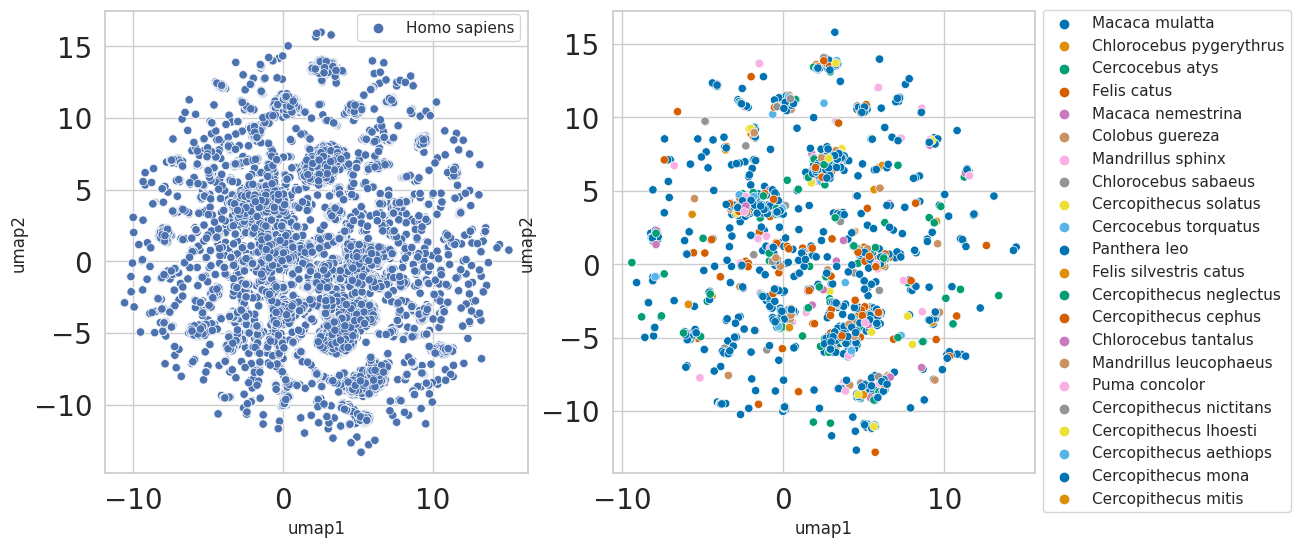

In [20]:
plt.clf()
fig, axs = plt.subplots(1, 2, figsize=(12, 6))
sns.set_theme(style="whitegrid")
plt.rcParams['xtick.labelsize'] = 20
plt.rcParams['ytick.labelsize'] = 20
plt.rcParams.update({'font.size': 20})

sns.scatterplot(data=umap_emb_df[umap_emb_df[label_col]=="Homo sapiens"], x="umap1", y="umap2", hue=label_col, ax=axs[0])
sns.scatterplot(data=umap_emb_df[umap_emb_df[label_col]!="Homo sapiens"], x="umap1", y="umap2", hue=label_col, ax=axs[1], palette="colorblind")
axs[0].legend(bbox_to_anchor=(1.00, 1.01))
axs[1].legend(bbox_to_anchor=(1.00, 1.02))